**Name: Rohan Dayal**  
**Roll No.: 19CO060**  
**DL Experiment 2**

## Problem Statement :-
Binary classification using Deep Neural Networks Example: Classify movie reviews into "positive" reviews and "negative" reviews, just based on the text content of the reviews. Use IMDB dataset

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from keras.datasets import imdb
from tensorflow.keras.callbacks import EarlyStopping

2023-05-10 18:29:14.972148: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-10 18:29:15.320252: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-10 18:29:15.322968: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-10 18:29:17.272364: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Data Collection :-

In [2]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((25000,), (25000,), (25000,), (25000,))

## EDA :-

In [3]:
# step 1: load the dictionary mappings from word to integer index
word_index = imdb.get_word_index()

# step 2: reverse word index to map integer indexes to their respective words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Step 3: decode the review, mapping integer indices to words indices are off by 
# 3 because 0, 1, and 2 are reserverd indices for "padding", "Start of sequence" and "unknown"
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in X_train[10]])

decoded_review

"? french horror cinema has seen something of a revival over the last couple of years with great films such as inside and ? romance ? on to the scene ? ? the revival just slightly but stands head and shoulders over most modern horror titles and is surely one of the best french horror films ever made ? was obviously shot on a low budget but this is made up for in far more ways than one by the originality of the film and this in turn is ? by the excellent writing and acting that ensure the film is a winner the plot focuses on two main ideas prison and black magic the central character is a man named ? sent to prison for fraud he is put in a cell with three others the quietly insane ? body building ? marcus and his retarded boyfriend daisy after a short while in the cell together they stumble upon a hiding place in the wall that contains an old ? after ? part of it they soon realise its magical powers and realise they may be able to use it to break through the prison walls br br black mag

## Feature Selection :-

In [4]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))    # Creates zero matrix of shape (len(sequences),10K)
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1
    return results

# Vectorize training Data
X_train = vectorize_sequences(X_train)

# Vectorize testing Data
X_test = vectorize_sequences(X_test)

In [5]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((25000, 10000), (25000,), (25000, 10000), (25000,))

In [6]:
unique, count = np.unique(y_train, return_counts=True)
dict(zip(unique, count))

{0: 12500, 1: 12500}

## Model Building :-

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation='relu', input_shape=(10000,)),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

2023-05-10 18:29:27.085930: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-10 18:29:27.088332: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [8]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [10]:
es = EarlyStopping(monitor='val_accuracy',patience=4)

In [11]:
history = model.fit(X_train, y_train, epochs=20, batch_size=100, validation_data=(X_val, y_val), callbacks=[es])

2023-05-10 18:29:40.061114: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 700000000 exceeds 10% of free system memory.


Epoch 1/20
170/175 [============================>.] - ETA: 0s - loss: 0.3870 - accuracy: 0.8422

2023-05-10 18:29:44.934800: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 300000000 exceeds 10% of free system memory.


175/175 [==============================] - 4s 15ms/step - loss: 0.3843 - accuracy: 0.8438 - val_loss: 0.2821 - val_accuracy: 0.8831
Epoch 2/20
175/175 [==============================] - 2s 12ms/step - loss: 0.1849 - accuracy: 0.9331 - val_loss: 0.3202 - val_accuracy: 0.8677
Epoch 3/20
175/175 [==============================] - 2s 9ms/step - loss: 0.1209 - accuracy: 0.9571 - val_loss: 0.3679 - val_accuracy: 0.8691
Epoch 4/20
175/175 [==============================] - 2s 10ms/step - loss: 0.0800 - accuracy: 0.9743 - val_loss: 0.4474 - val_accuracy: 0.8656
Epoch 5/20
175/175 [==============================] - 2s 10ms/step - loss: 0.0466 - accuracy: 0.9861 - val_loss: 0.5449 - val_accuracy: 0.8639


## Model Evaluation :-

/tmp/ipykernel_73579/3520882667.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
/tmp/ipykernel_73579/3520882667.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

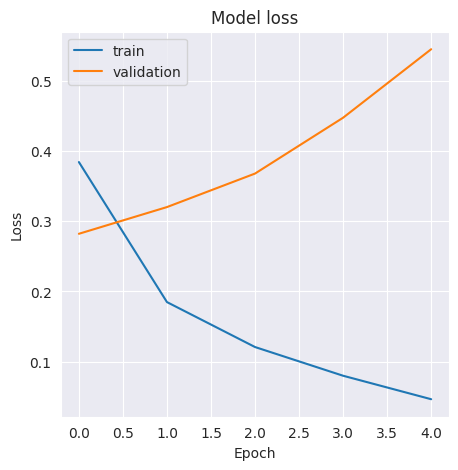

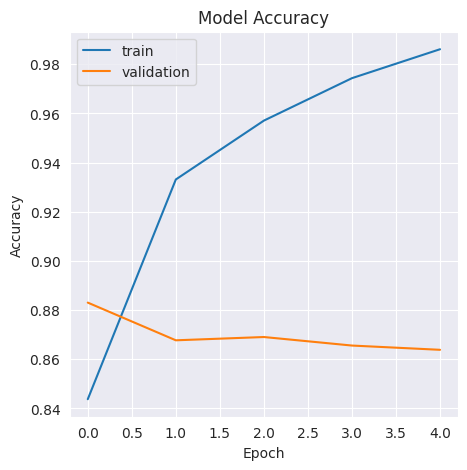

In [12]:
df_loss_acc = pd.DataFrame(history.history)
df_loss = df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(5,5)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(5,5)).set(xlabel='Epoch',ylabel='Accuracy')

In [13]:
preds = model.predict(X_test).round()

2023-05-10 18:30:02.684108: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1000000000 exceeds 10% of free system memory.


782/782 [==============================] - 3s 4ms/step


In [14]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85     12500
           1       0.84      0.87      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



In [15]:
confusion_matrix(y_test, preds)

array([[10455,  2045],
       [ 1563, 10937]])